Notebook de Roger Oliveira Nunes Gomes, com base no template "AluraStoreBR.
  O desafio AllureStore consta de uma Analise de Dados a ser desenvolvida, neste ambiente, em Python.

O Desafio  AllureStore tem como objetivo analisar o desempenho das quatro lojas do e-commerce Alura Store para determinar qual delas apresenta os menores resultados e pode ser vendida para viabilizar um novo investimento.

A análise considera métricas como faturamento total, categorias populares, média de avaliação dos clientes, produtos vendidos e custo médio do frete. Com esses dados, será possível identificar a loja menos eficiente e recomendar a melhor decisão para otimização dos recursos.

Este conteúdo se divide nas seções:

1. Importação de Dados
2. Análise do Faturamento
3. Vendas por Categoria
4. Média de avaliação das lojas
5. Produtos Mais e Menos vendidos
6. Frete médio por loja






# 1.Importação dos dados



In [ ]:


import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

import pandas as pd

# Cria uma lista com os DataFrames de cada loja
lojas = [loja1, loja2, loja3, loja4]

# Cria uma lista com os nomes das lojas
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Cria o DataFrame 'todas_as_lojas'
todas_as_lojas = pd.DataFrame()
for i in range(len(lojas)):
    # Adiciona a coluna 'Loja' ao DataFrame da loja atual
    lojas[i]['Loja'] = nomes_lojas[i]
    # Concatena o DataFrame da loja atual ao DataFrame 'todas_as_lojas'
    todas_as_lojas = pd.concat([todas_as_lojas, lojas[i]], ignore_index=True)

# Verifica se a coluna 'Loja' foi criada corretamente
print(todas_as_lojas.head())
print(todas_as_lojas.tail())






                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    Loja  
0    cartao_credito                       8 -22.19 -48.79  Loja 1  
1    carta

Conhecendo a tabela

Conferindo se  as tabelas possuem as mesmas colunas, os memos tipos de dados

In [ ]:

for i, loja in enumerate(lojas):
    print(f"Colunas da {nomes_lojas[i]}: {loja.columns.tolist()}")


Colunas da Loja 1: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja']
Colunas da Loja 2: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja']
Colunas da Loja 3: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja']
Colunas da Loja 4: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja']


In [ ]:
print(todas_as_lojas.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 2.Faturamento

faturamento total das 4 lojas

In [ ]:

faturamento_total = todas_as_lojas["Preço"].sum()


faturamento_total_formatado = "{:,.2f}".format(faturamento_total).replace(",", "X").replace(".", ",").replace("X", ".")

print(f" Faturamento total das 4 lojas: R$ {faturamento_total_formatado}")



 Faturamento total das 4 lojas: R$ 5.871.490,79


Faturamento total por loja

In [ ]:

def formatar_moeda(valor):
    return "{:,.2f}".format(valor).replace(",", "X").replace(".", ",").replace("X", ".")


faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()


print(f" Faturamento da Loja 1: R$ {formatar_moeda(faturamento_loja1)}")
print(f" Faturamento da Loja 2: R$ {formatar_moeda(faturamento_loja2)}")
print(f" Faturamento da Loja 3: R$ {formatar_moeda(faturamento_loja3)}")
print(f" Faturamento da Loja 4: R$ {formatar_moeda(faturamento_loja4)}")




 Faturamento da Loja 1: R$ 1.534.509,12
 Faturamento da Loja 2: R$ 1.488.459,06
 Faturamento da Loja 3: R$ 1.464.025,03
 Faturamento da Loja 4: R$ 1.384.497,58


Gráfico para visualizar o percentual de vendas  por loja

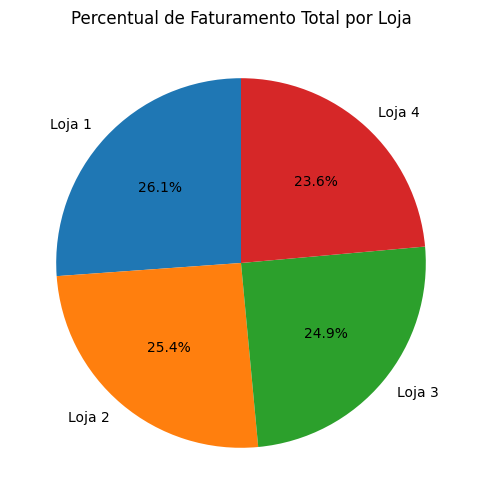

In [ ]:
import matplotlib.pyplot as plt

# Calcular o faturamento total por loja
faturamento_por_loja = todas_as_lojas.groupby("Loja")["Preço"].sum()

# Calcular o percentual de faturamento de cada loja
percentual_faturamento = (faturamento_por_loja / faturamento_por_loja.sum()) * 100

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(percentual_faturamento, labels=percentual_faturamento.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentual de Faturamento Total por Loja")
plt.show()

Loja de maior faturamento e de menor faturamento

In [ ]:

faturamento_por_loja = todas_as_lojas.groupby("Loja")["Preço"].sum()


def formatar_moeda(valor):
    return "{:,.2f}".format(valor).replace(",", "X").replace(".", ",").replace("X", ".")


loja_maior_faturamento = faturamento_por_loja.idxmax()
maior_faturamento = faturamento_por_loja.max()


loja_menor_faturamento = faturamento_por_loja.idxmin()
menor_faturamento = faturamento_por_loja.min()


print(f" A loja que mais fatura é {loja_maior_faturamento}, com um faturamento de R$ {formatar_moeda(maior_faturamento)}")
print(f" A loja que menos fatura é {loja_menor_faturamento}, com um faturamento de R$ {formatar_moeda(menor_faturamento)}")


 A loja que mais fatura é Loja 1, com um faturamento de R$ 1.534.509,12
 A loja que menos fatura é Loja 4, com um faturamento de R$ 1.384.497,58


Gráfico para visualização do faturamento total por loja

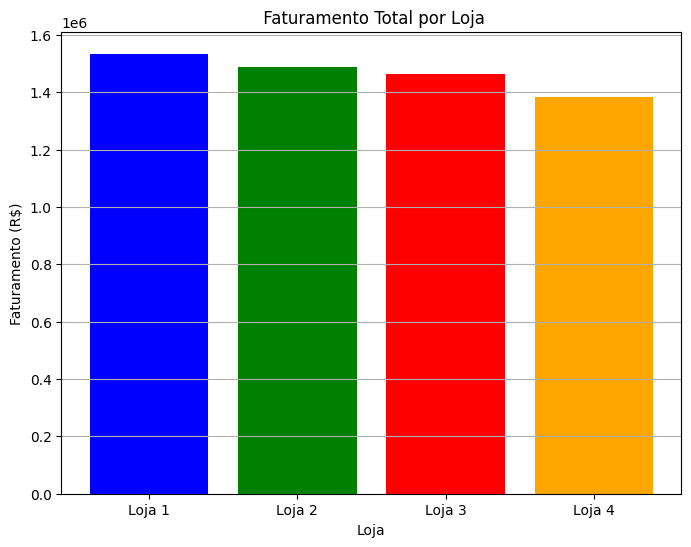

In [ ]:
import matplotlib.pyplot as plt


faturamento_por_loja = todas_as_lojas.groupby("Loja")["Preço"].sum()


plt.figure(figsize=(8, 6))
plt.bar(faturamento_por_loja.index, faturamento_por_loja.values, color=['blue', 'green', 'red', 'orange'])

plt.title(" Faturamento Total por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.grid(axis="y")

plt.show()


Gráficos para visualização da curva de fauramento
por loja nos últimos 12 meses de atividades

<ipython-input-125-8bf6a3417e0a>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  todas_as_lojas["Data da Compra Formatada"] = pd.to_datetime(todas_as_lojas["Data da Compra"], errors="coerce")


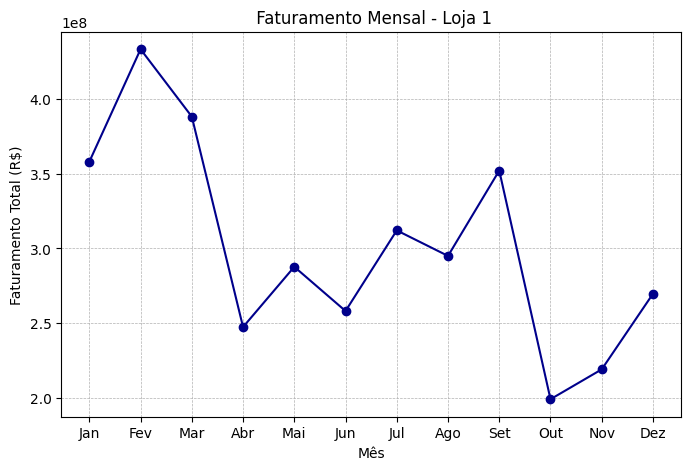

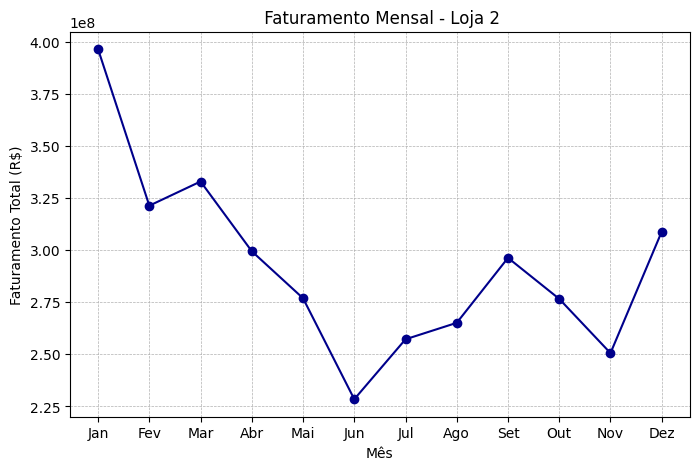

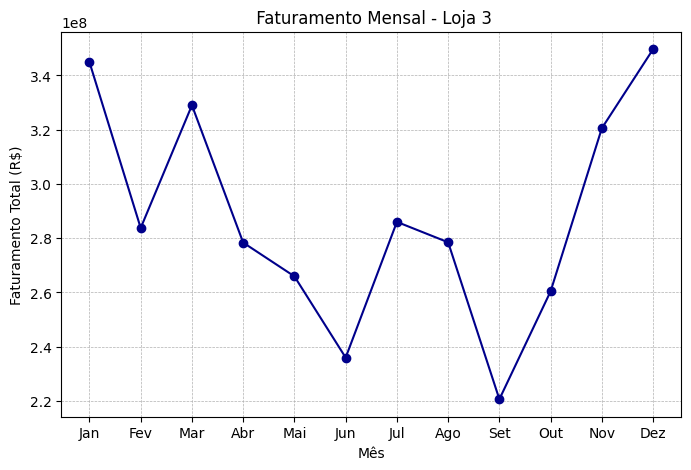

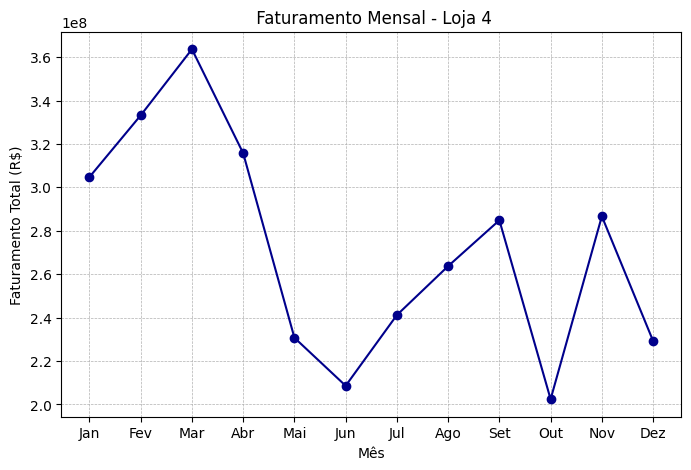

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


todas_as_lojas["Data da Compra Formatada"] = pd.to_datetime(todas_as_lojas["Data da Compra"], errors="coerce")


todas_as_lojas["Faturamento"] = todas_as_lojas["Preço"] * todas_as_lojas.groupby("Loja")["Loja"].transform("count")


for loja in todas_as_lojas["Loja"].unique():
    plt.figure(figsize=(8, 5))  # Configuração do tamanho do gráfico


    dados_loja = todas_as_lojas[todas_as_lojas["Loja"] == loja]


    faturamento_mensal = dados_loja.groupby(dados_loja["Data da Compra Formatada"].dt.month)["Faturamento"].sum()

    plt.plot(faturamento_mensal.index, faturamento_mensal.values, marker="o", linestyle="-", color="darkblue")


    plt.title(f" Faturamento Mensal - {loja}")
    plt.xlabel("Mês")
    plt.ylabel("Faturamento Total (R$)")
    plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    plt.grid(True, linestyle="--", linewidth=0.5)

    plt.show()


Estados que mais geram faturamento x quantidade de compras efetuadas por clientes

In [ ]:
estados_que_mais_compram = todas_as_lojas['Local da compra'].value_counts()
print(estados_que_mais_compram)

Local da compra
SP    3943
RJ    1212
MG    1102
RS     534
PR     473
SC     346
BA     310
DF     242
GO     186
PE     181
ES     171
CE     151
MS      82
PA      81
MT      80
MA      62
RN      48
PB      46
AL      41
PI      40
TO      29
SE      28
RO      19
AM      14
AP       9
AC       3
RR       2
Name: count, dtype: int64


Tabela de faturamento de cada loja, por estado(locais de compra)

In [ ]:
from tabulate import tabulate
import pandas as pd


faturamento_por_estado_loja = todas_as_lojas.groupby(['Loja', 'Local da compra'])['Preço'].sum().reset_index()

tabela_faturamento = faturamento_por_estado_loja.pivot(index='Loja', columns='Local da compra', values='Preço').fillna(0)

def formatar_moeda(valor):
    return "R$ {:,.2f}".format(valor).replace(",", "X").replace(".", ",").replace("X", ".")

tabela_faturamento_formatada = tabela_faturamento.applymap(formatar_moeda)

tabela_formatada = tabulate(tabela_faturamento_formatada, headers="keys", tablefmt="fancy_grid")

print(tabela_formatada)

╒════════╤═════════╤══════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤══════════╤══════════╤════════╤═════════╤══════════╤══════════╤══════════╤═════════╤══════════╤═════════╤════════╤══════════╤═════════╤═════════╤══════════╤═════════╤═════════╤════════╤═════════╕
│ Loja   │      AC │       AL │      AM │      AP │      BA │      CE │      DF │      ES │       GO │       MA │     MG │      MS │       MT │       PA │       PB │      PE │       PI │      PR │     RJ │       RN │      RO │      RR │       RS │      SC │      SE │     SP │      TO │
╞════════╪═════════╪══════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪══════════╪══════════╪════════╪═════════╪══════════╪══════════╪══════════╪═════════╪══════════╪═════════╪════════╪══════════╪═════════╪═════════╪══════════╪═════════╪═════════╪════════╪═════════╡
│ Loja 1 │ 2320.42 │ 10703.4  │ 1495.21 │ 1309.54 │ 43877.3 │ 17598   │ 29729.2 │ 18620.8 │ 50505.5  │  4115.02 │ 165802 │ 11798.6 │ 15444.

Tabela de percentual por estado(locais de compra)

In [ ]:

tabela_percentual = tabela_faturamento.div(tabela_faturamento.sum(axis=1), axis=0) * 100

tabela_formatada_percentual = tabulate(tabela_percentual, headers="keys", tablefmt="fancy_grid")
print("\n Percentual de faturamento por estado:")
print(tabela_formatada_percentual)



📊 Percentual de faturamento por estado:
╒════════╤════════════╤══════════╤═══════════╤═══════════╤═════════╤═════════╤═════════╤═════════╤══════════╤══════════╤═════════╤══════════╤══════════╤══════════╤══════════╤═════════╤══════════╤═════════╤═════════╤══════════╤══════════╤═══════════╤═════════╤═════════╤═══════════╤═════════╤═══════════╕
│ Loja   │         AC │       AL │        AM │        AP │      BA │      CE │      DF │      ES │       GO │       MA │      MG │       MS │       MT │       PA │       PB │      PE │       PI │      PR │      RJ │       RN │       RO │        RR │      RS │      SC │        SE │      SP │        TO │
╞════════╪════════════╪══════════╪═══════════╪═══════════╪═════════╪═════════╪═════════╪═════════╪══════════╪══════════╪═════════╪══════════╪══════════╪══════════╪══════════╪═════════╪══════════╪═════════╪═════════╪══════════╪══════════╪═══════════╪═════════╪═════════╪═══════════╪═════════╪═══════════╡
│ Loja 1 │ 0.151216   │ 0.69751  │ 0.097439  │ 

Mapa para visualizar o faturamento obtido, por estado.

In [ ]:
import folium
import pandas as pd

# 📌 Criar um mapa centrado no Brasil
mapa = folium.Map(location=[-14.235, -51.925], zoom_start=4)

# 📌 Criar dataframe com latitudes, longitudes e volume de compras
dados_lojas = todas_as_lojas.groupby(["lat", "lon"]).size().reset_index(name="Volume")

# 📌 Adicionar esferas proporcionais ao volume de compras
for _, row in dados_lojas.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=row["Volume"] ** 0.5,  # 📌 Ajuste para tamanhos proporcionais
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
        popup=f"📍 Compras: {row['Volume']}"
    ).add_to(mapa)

# Crie um marcador com o título da legenda
titulo_legenda = folium.Marker(
    location=[-20, -50],  # Posição discreta do mapa
    popup="Mapa para visualização de faturamento por Estado",
    icon=folium.Icon(color="blue", icon="info-sign")  # Ícone de legenda
)

# Adicione o marcador ao mapa
mapa.add_child(titulo_legenda)

# Exiba o mapa
mapa


# 3. Vendas por Categoria


Os 10 ítens mais vendidos com as respectivas quantidades.

In [ ]:
Categorias_populares = todas_as_lojas['Categoria do Produto'].value_counts()
print(Categorias_populares)

Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


Gráfico demonstrativo das 10 categorias mais vendidas

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


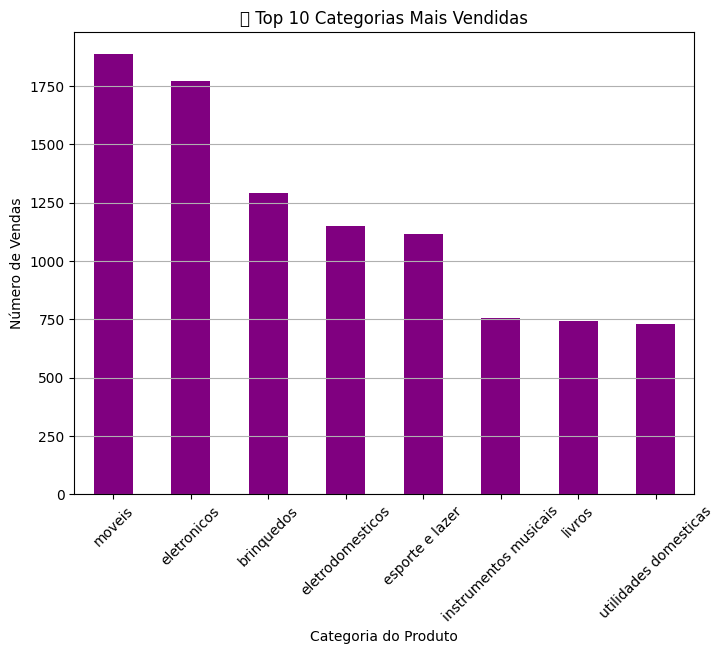

In [ ]:
import matplotlib.pyplot as plt

Categorias_populares.head(10).plot(kind="bar", figsize=(8,6), color="purple")
plt.title(" Top 10 Categorias Mais Vendidas")
plt.xlabel("Categoria do Produto")
plt.ylabel("Número de Vendas")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


Gráfico de dispersão demonstrando a relação entre os 10 itens mais vendidos ao futuramento por loja

<ipython-input-19-598a63e41198>:41: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(
<ipython-input-19-598a63e41198>:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


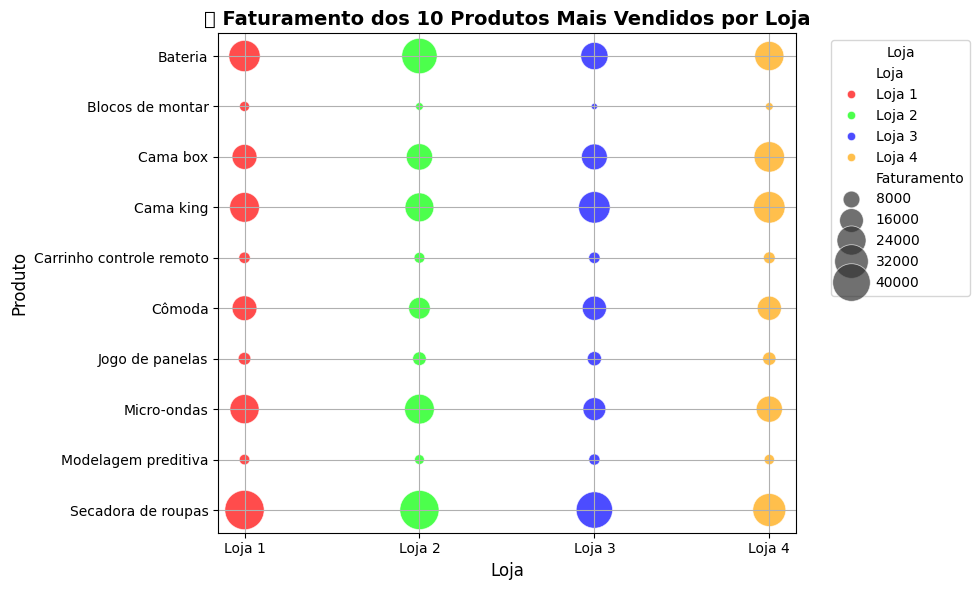

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Cópia do dataframe
df = todas_as_lojas.copy()

# 2. Calcular quantas vezes cada produto foi vendido em cada loja
quantidade_por_produto = df.groupby(["Loja", "Produto"]).size().reset_index(name="Quantidade Vendida")

# 3. Obter o preço unitário mais comum de cada produto por loja (para evitar erros com preços diferentes)
preco_unitario = (
    df.groupby(["Loja", "Produto"])["Preço"]
    .agg(lambda x: x.mode().iloc[0])  # pega o preço mais comum
    .reset_index()
)

# 4. Juntar as duas tabelas: quantidade + preço
dados = quantidade_por_produto.merge(preco_unitario, on=["Loja", "Produto"])

# 5. Calcular o faturamento
dados["Faturamento"] = dados["Quantidade Vendida"] * dados["Preço"]

# 6. Selecionar os 10 produtos mais vendidos (no total, somando todas as lojas)
top_10_produtos = (
    dados.groupby("Produto")["Quantidade Vendida"]
    .sum()
    .nlargest(10)
    .index
    .tolist()
)

# 7. Filtrar só os top 10 produtos
dados_top_10 = dados[dados["Produto"].isin(top_10_produtos)]

# 8. Cores das lojas
cores_contrastantes = ["#FF0000", "#00FF00", "#0000FF", "#FFA500", "#800080"]

# 9. Criar o gráfico
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=dados_top_10,
    x="Loja",
    y="Produto",
    size="Faturamento",
    hue="Loja",
    palette=cores_contrastantes,
    sizes=(20, 800),
    alpha=0.7
)

plt.title("📊 Faturamento dos 10 Produtos Mais Vendidos por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Produto", fontsize=12)
plt.legend(title="Loja", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()












# 4. Média de Avaliação das Lojas

In [ ]:
print(avaliação_compras.sort_values(ascending=False).round(2))  # Ordena da maior para a menor avaliação


Loja
Loja 3    4.05
Loja 2    4.04
Loja 4    4.00
Loja 1    3.98
Name: Avaliação da compra, dtype: float64


Gráfico de pizza para visualizar a Média das Avaliações por Loja

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127829 (\N{SLICE OF PIZZA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


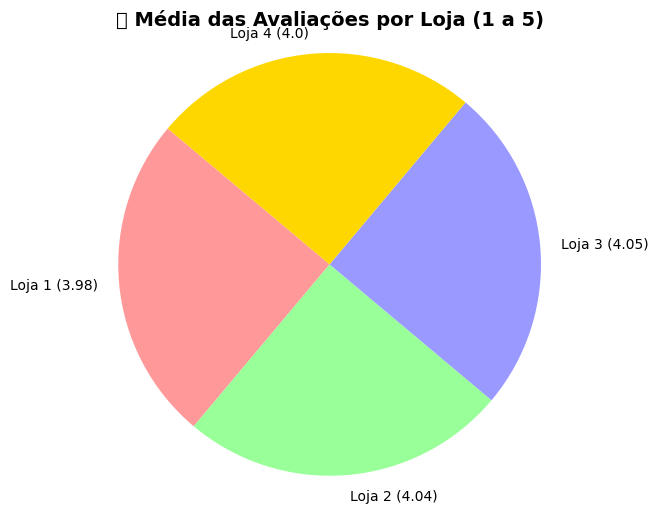

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cópia dos dados
df = todas_as_lojas.copy()

# 2. Calcular a média da avaliação por loja
media_avaliacoes = df.groupby("Loja")["Avaliação da compra"].mean().round(2)

# 3. Criar gráfico de pizza com médias reais (não porcentagem)
plt.figure(figsize=(6,6))
plt.pie(
    [1]*len(media_avaliacoes),  # fatias iguais, pois não queremos percentual
    labels=[f"{loja} ({media})" for loja, media in media_avaliacoes.items()],
    startangle=140,
    colors=["#FF9999", "#99FF99", "#9999FF", "#FFD700"]
)
plt.title("🍕 Média das Avaliações por Loja (1 a 5)", fontsize=14, fontweight="bold")
plt.axis("equal")  # mantém o círculo redondo
plt.show()


Avaliações por Loja: Ruins, Neutras e Boas

<ipython-input-25-1b06100e38b7>:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


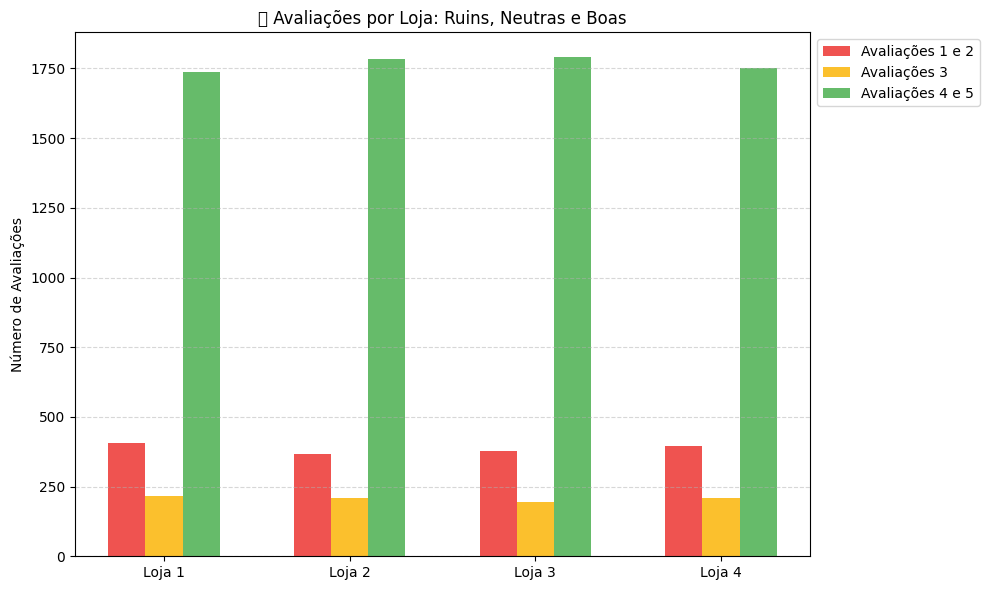

In [ ]:
import matplotlib.pyplot as plt

# 1. Categorizar avaliações
avaliacoes_ruins = df[df["Avaliação da compra"].isin([1, 2])]
avaliacoes_neutras = df[df["Avaliação da compra"] == 3]
avaliacoes_boas = df[df["Avaliação da compra"].isin([4, 5])]

# 2. Contar por loja
contagem_ruins = avaliacoes_ruins["Loja"].value_counts()
contagem_neutras = avaliacoes_neutras["Loja"].value_counts()
contagem_boas = avaliacoes_boas["Loja"].value_counts()

# 3. Preparar o eixo X
lojas = sorted(df["Loja"].unique())
x = range(len(lojas))
largura = 0.2  # menor largura por causa de 3 barras

# 4. Criar gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# 5. Adicionar cada grupo de barra
ax.bar([i - largura for i in x], [contagem_ruins.get(loja, 0) for loja in lojas],
       width=largura, label="Avaliações 1 e 2", color="#EF5350")

ax.bar(x, [contagem_neutras.get(loja, 0) for loja in lojas],
       width=largura, label="Avaliações 3", color="#FBC02D")

ax.bar([i + largura for i in x], [contagem_boas.get(loja, 0) for loja in lojas],
       width=largura, label="Avaliações 4 e 5", color="#66BB6A")

# 6. Ajustes visuais
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.set_ylabel("Número de Avaliações")
ax.set_title(" Avaliações por Loja: Ruins, Neutras e Boas")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()




# 5.  Produtos Mais e Menos Vendidos

os 10 produtosmais vendidos:

In [ ]:
produtos_mais_vendidos = todas_as_lojas['Produto'].value_counts().head(10)
print(produtos_mais_vendidos)

Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199
Name: count, dtype: int64


Os 10 produtos menos vendidos:

In [ ]:
produtos_menos_vendidos = todas_as_lojas['Produto'].value_counts(ascending=True).head(10)
print(produtos_menos_vendidos)

Produto
Celular ABXY                   157
Headset                        158
Mochila                        163
Guitarra                       165
Ciência de dados com python    166
Assistente virtual             167
Poltrona                       168
Jogo de copos                  169
Smartwatch                     172
Panela de pressão              172
Name: count, dtype: int64


Gráfico demonstrativo dos 10 poduto mais vendidos

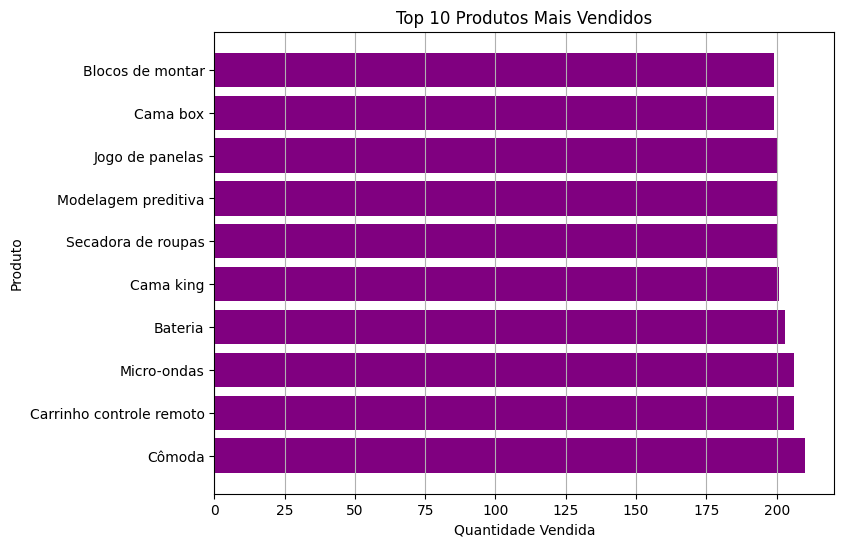

In [ ]:
import matplotlib.pyplot as plt

produtos_mais_vendidos = todas_as_lojas['Produto'].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.barh(produtos_mais_vendidos.index, produtos_mais_vendidos.values, color='purple')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.grid(axis='x')
plt.show()

# 6. Frete Médio por Loja


Percentual de gasto com frete sobre o faturamento de cada loja loja:

In [ ]:
import pandas as pd

todas_as_lojas["Data da Compra Formatada"] = pd.to_datetime(todas_as_lojas["Data da Compra"], errors="coerce")

# Calculando o faturamento total por loja
faturamento_por_loja = todas_as_lojas.groupby("Loja")["Preço"].sum()

# Calculando o frete total por loja
frete_por_loja = todas_as_lojas.groupby("Loja")["Frete"].sum()

# Calculando o percentual de gasto com frete sobre o faturamento por loja
percentual_frete_por_loja = (frete_por_loja / faturamento_por_loja) * 100

# Exibindo os resultados
print("\n Percentual de gasto com frete sobre faturamento total por loja:\n")
for loja, percentual in percentual_frete_por_loja.items():
    print(f"{loja}: {percentual:.2f}%")





 Percentual de gasto com frete sobre faturamento total por loja:

Loja 1: 5.33%
Loja 2: 5.33%
Loja 3: 5.33%
Loja 4: 5.33%


<ipython-input-112-4403ebe27850>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  todas_as_lojas["Data da Compra Formatada"] = pd.to_datetime(todas_as_lojas["Data da Compra"], errors="coerce")


Frete médio por loja

In [ ]:
# Agrupa por loja e calcula a média do frete
frete_medio_por_loja = todas_as_lojas.groupby('Loja')['Frete'].mean()

print("\n Frete Médio por Loja:\n")

for loja, valor in frete_medio_por_loja.round(2).items():
    print(f"{loja}: R$ {valor:.2f}")





 Frete Médio por Loja:

Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


Gráfico demonstrativo da média de valores, em Reais, por loja

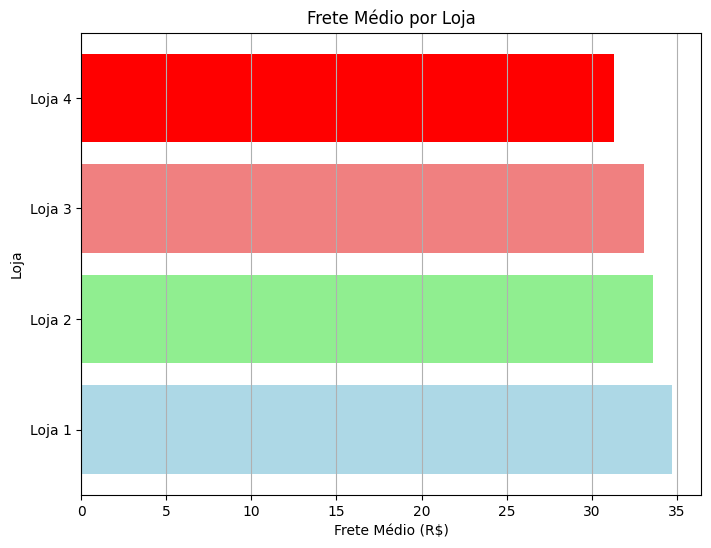

In [ ]:
import matplotlib.pyplot as plt

frete_medio_por_loja = todas_as_lojas.groupby('Loja')['Frete'].mean()

plt.figure(figsize=(8, 6))
plt.barh(frete_medio_por_loja.index, frete_medio_por_loja.values, color=['lightblue', 'lightgreen', 'lightcoral', 'red'])  # Destacando a Loja 4 em vermelho
plt.title('Frete Médio por Loja')
plt.xlabel('Frete Médio (R$)')
plt.ylabel('Loja')
plt.grid(axis='x')
plt.show()

Percentual de gasto com frete sobre faturamento total por loja

In [ ]:

def formatar_moeda(valor):
    return "R$ {:,.2f}".format(valor).replace(",", "X").replace(".", ",").replace("X", ".")


print("\n Percentual de gasto com frete sobre faturamento total por loja:\n")

for loja in todas_as_lojas["Loja"].unique():
    faturamento_total = faturamento_por_loja[loja]
    frete_total = frete_por_loja[loja]
    percentual_frete = percentual_frete_por_loja[loja]

    print(f" Loja: {loja}")
    print(f" Faturamento Total: {formatar_moeda(faturamento_total)}")
    print(f" Frete Total: {formatar_moeda(frete_total)}")
    print(f" Percentual de Frete sobre Faturamento: {round(percentual_frete, 2)}%")
    print("-" * 40)  # Linha para separar cada loja





 Percentual de gasto com frete sobre faturamento total por loja:

 Loja: Loja 1
 Faturamento Total: R$ 4.563.636,11
 Frete Total: R$ 81.837,97
 Percentual de Frete sobre Faturamento: 1.79%
----------------------------------------
 Loja: Loja 2
 Faturamento Total: R$ 4.449.584,18
 Frete Total: R$ 79.314,16
 Percentual de Frete sobre Faturamento: 1.78%
----------------------------------------
 Loja: Loja 3
 Faturamento Total: R$ 4.325.091,42
 Frete Total: R$ 78.022,66
 Percentual de Frete sobre Faturamento: 1.8%
----------------------------------------
 Loja: Loja 4
 Faturamento Total: R$ 4.131.753,14
 Frete Total: R$ 73.755,88
 Percentual de Frete sobre Faturamento: 1.79%
----------------------------------------
